# Image preprocessing with [scikit-image](https://scikit-image.org/)
Dataset: [Annotated honey bee images](https://www.kaggle.com/jenny18/honey-bee-annotated-images) from Kaggle

### Install dependencies

In [ ]:
!pip install Pillow
!pip install scikit-image
!pip install imageio

In [118]:
import os

import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import PIL
from PIL import Image
import skimage

%matplotlib inline

### Read data from `input` folder to Pandas dataframe

In [3]:
data_dir = 'input'
img_dir = os.path.join(data_dir, 'bee_imgs')
data_csv = os.path.join(data_dir, 'bee_data.csv')
data = pd.read_csv(data_csv)
print('Number of rows:', len(data))

Number of rows: 5172


### Show first five rows of dataframe

In [4]:
data.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


### Add a column `img` for file path to images

In [117]:
def to_file_path(file_name):
    return os.path.join(img_dir, file_name)

data = data.assign(**{'img': data.file.transform(to_file_path)})

### Use the first bee image as an example, read as Numpy array

In [7]:
example_img_path = data.iloc[0].img
img = mpimg.imread(example_img_path) # Numpy array

### Plot image with matplotlib

Text(0.5, 1.0, 'Original image')

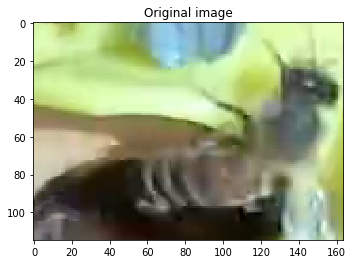

In [10]:
plt.imshow(img)
plt.title('Original image')

### Convert image to grayscale

Text(0.5, 1.0, 'Grayscale')

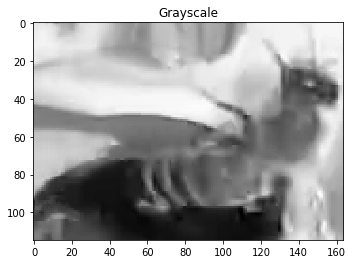

In [14]:
img_gray = skimage.color.rgb2gray(img)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale')

### Define a helper function for plotting image and histogram

In [88]:
from skimage import exposure
from functools import partial

# http://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_equalize.html#sphx-glr-auto-examples-color-exposure-plot-equalize-py
def plot_img_and_hist(image, axes=None, bins=64, title=None):
    """Plot an image along with its histogram and cumulative histogram.

    """
    if axes is None:
        fig, axes = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[1.5, 1]})
        fig.set_size_inches((8, 4))
        # fig.tight_layout()
    ax_img, ax_hist = axes
    # ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    
    if title is not None:
        ax_img.set_title(title)

    # Display histograms per channel
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]
    
    plot_hist = partial(ax_hist.hist, bins=bins, histtype='bar', linewidth=2, alpha=0.3, density=True)
    plot_hist(red.ravel(), color='red')
    plot_hist(green.ravel(), color='green')
    plot_hist(blue.ravel(), color='blue')

    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_ylim([0, 3])
    ax_hist.set_yticks([])
    
    ax_hist.set_title('Histogram')

    # Display cumulative distribution
    # img_cdf, bins = exposure.cumulative_distribution(image, bins)
    # ax_cdf.plot(bins, img_cdf, 'r')
    # ax_cdf.set_yticks([])

    return ax_img, ax_hist # , ax_cdf

### Plot original image with histogram

(<matplotlib.axes._subplots.AxesSubplot at 0x12188c4e0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x128d0b278>)

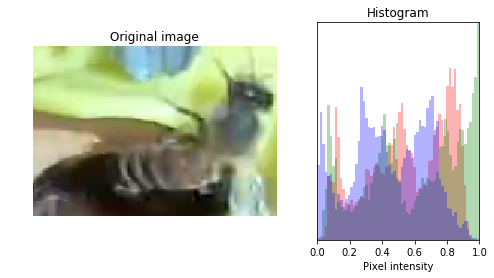

In [89]:
plot_img_and_hist(img, title='Original image')

### [Rescale intensity](http://scikit-image.org/docs/dev/api/skimage.exposure.html#rescale-intensity): Boost contrast by "stretching" intensity between given min and max and clipping the rest

(<matplotlib.axes._subplots.AxesSubplot at 0x129147e48>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1293d0048>)

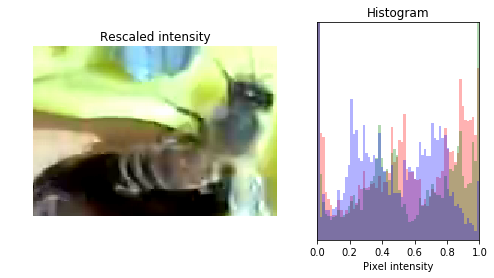

In [91]:
low = 0.10  # Pixels with intensity smaller than this will be black
high = 0.90  # Pixels with intensity larger than this will be white
img_rescaled = exposure.rescale_intensity(img, in_range=(low, high))
plot_img_and_hist(img_rescaled, title='Rescaled intensity')

### [Equalize histogram](http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist)

/Users/kimmo/.pyenv/versions/3.6.2/envs/python-3.6.2/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


(<matplotlib.axes._subplots.AxesSubplot at 0x129df8860>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12c3444e0>)

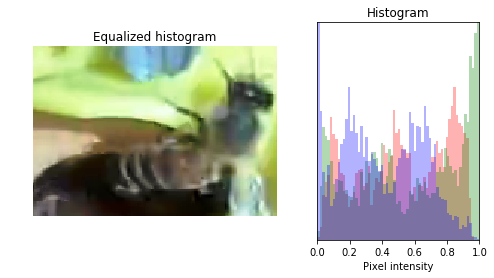

In [100]:
img_eq = exposure.equalize_hist(img)
plot_img_and_hist(img_eq, title='Equalized histogram')

### [Contrast Limited Adaptive Histogram Equalization](http://scikit-image.org/docs/dev/api/skimage.exposure.html#equalize-adapthist)

/Users/kimmo/.pyenv/versions/3.6.2/envs/python-3.6.2/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/Users/kimmo/.pyenv/versions/3.6.2/envs/python-3.6.2/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to float32
  .format(dtypeobj_in, dtypeobj_out))


(<matplotlib.axes._subplots.AxesSubplot at 0x12c8b3a58>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12c8aea90>)

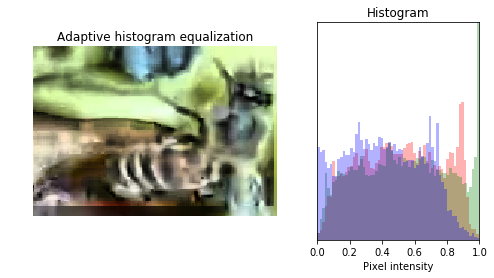

In [101]:
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
plot_img_and_hist(img_adapteq, title='Adaptive histogram equalization')

### [Gamma adjustment](http://scikit-image.org/docs/dev/api/skimage.exposure.html#adjust-gamma)

(<matplotlib.axes._subplots.AxesSubplot at 0x12be47438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12c752128>)

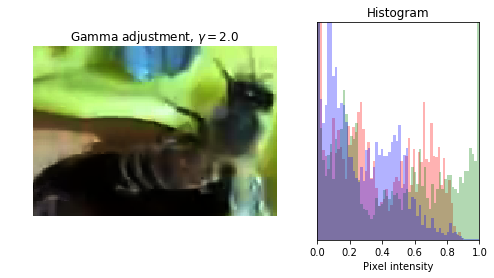

In [102]:
gamma_corrected_2 = exposure.adjust_gamma(img, 2.0)
plot_img_and_hist(gamma_corrected_2, title='Gamma adjustment, $\gamma=2.0$')

(<matplotlib.axes._subplots.AxesSubplot at 0x12c836be0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12cbc54e0>)

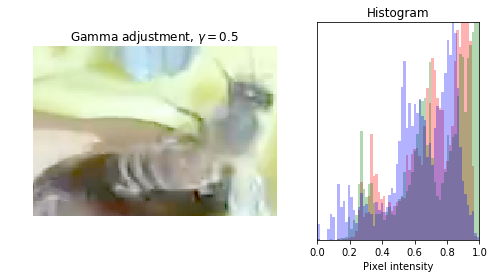

In [103]:
gamma_corrected_05 = exposure.adjust_gamma(img, 0.5)
plot_img_and_hist(gamma_corrected_05, title='Gamma adjustment, $\gamma=0.5$')

## Examples of other libraries for working with images

### [ImageIO](http://imageio.github.io/)
"Imageio is a Python library that provides an easy interface to read and write a wide range of image data, including animated images, video, volumetric data, and scientific formats."

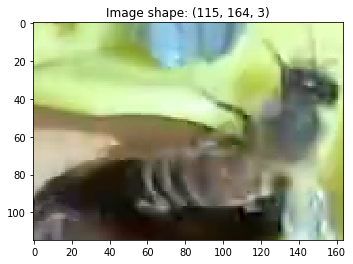

In [105]:
def show_imageio(img_path):
    img = imageio.imread(img_path)
    plt.imshow(img)
    plt.title('Image shape: (%d, %d, %d)' % img.shape)

show_imageio(example_img_path)

### [Pillow library (Image)](https://pillow.readthedocs.io/en/3.1.x/reference/Image.html)
"The Python Imaging Library adds image processing capabilities to your Python interpreter. -- The library contains basic image processing functionality, including point operations, filtering with a set of built-in convolution kernels, and colour space conversions. The library also supports image resizing, rotation and arbitrary affine transforms."

Original image bounding box: (0, 0, 164, 115)
Post-crop bounding box: (0, 0, 150, 100)
Post-resize bounding box: (0, 0, 600, 400)


Text(0.5, 1.0, 'Image after processing')

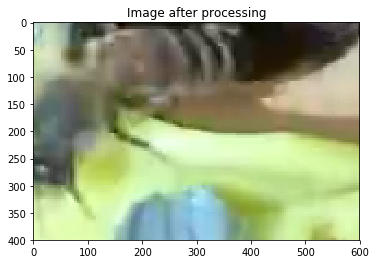

In [113]:
# This is a lazy operation; this function identifies the file, but the file remains open and the 
# actual image data is not read from the file until you try to process the data (or call the load() method).
img = PIL.Image.open(example_img_path)

# Print bounding box
print('Original image bounding box:', img.getbbox())

# Cropping
img = img.crop((0, 0, 150, 100))

# Print bounding box
print('Post-crop bounding box:', img.getbbox())

# Resize
img = img.resize((600, 400), resample=PIL.Image.NEAREST)

# Print bounding box
print('Post-resize bounding box:', img.getbbox())

# Rotate image
img = img.rotate(180)

# Show
plt.imshow(img)
plt.title('Image after processing')

Pillow image can be converted to Numpy array like this:

In [116]:
# Get image as list of pixel values
arr = list(img.getdata())

# Reshape to 3D (numpy) array, note that img.size[0] is width and img.size[1] is height
img_np = np.array(arr).reshape((img.size[1], img.size[0], 3))

print('Numpy array shape:', img_np.shape)

Numpy array shape: (400, 600, 3)
